In [1]:
import numpy as np
import matplotlib.pyplot as plt

class image_unit:
    def __init__(self) -> None:
        self.num_of_points = 0
        self.cord_of_points = np.array([])
        self.raw_image = np.array([])
    def print_data(self) -> None:
        print(self.num_of_points)
        print(self.cord_of_points)
        print(self.raw_image)
        # Plotting the array as a grayscale image
        plt.imshow(self.raw_image, cmap='viridis')
        plt.colorbar()  # Adding a colorbar to show intensity scale
        plt.title('Visualization')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.show()

100
No. 1
<class 'numpy.float64'>
30
[[12.00638936 52.12484841]
 [37.69840799 11.53275198]
 [ 4.6555542  56.61889214]
 [18.99682261 44.65868591]
 [35.19309264 17.68850439]
 [42.88550653 44.72523449]
 [33.94812774  7.25441778]
 [20.03730638 55.98249827]
 [32.04542142 23.44752272]
 [31.00879278 48.17737619]
 [15.59092996  4.64137947]
 [33.09481897 20.73194144]
 [26.74895297 20.31979496]
 [30.66664562  6.41752132]
 [41.076138   31.63930414]
 [51.50470251 30.54716235]
 [45.09445019  5.49322449]
 [48.76298608 19.97325151]
 [10.78458384 13.96232028]
 [34.96314403 33.41411481]
 [28.57857671 53.65401298]
 [54.70297412 10.17688513]
 [34.88885547  5.56140029]
 [46.95458868 25.05599521]
 [36.23076301 20.94807669]
 [30.92748013 53.20467811]
 [22.94798988 47.27887382]
 [ 9.86237542 36.24539731]
 [31.31588537 44.37351676]
 [28.20310438 23.56467   ]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0

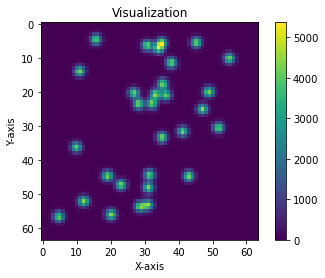

In [2]:
# Specify the path to your text file
file_path = './Clusters_2D_100_30.txt'
images = []

# For every image:
# Line 1: number of points(10)
# Line 2-11: exact positions of the points
# Others: grayscale image
with open(file_path, 'r') as file:
    cop = [] # Store cordinates of points tempoarily
    ri = [] # Store raw image tempoarily
    for line in file:
        numbers = []
        numbers = [float(s) for s in line.strip().split()]
        if len(numbers) == 1:
            if len(images) > 0:
                images[-1].raw_image = np.array(ri).T
                ri.clear()
            images.append(image_unit())
            images[-1].num_of_points = int(numbers[0])
        elif len(numbers) == 2:
            cop.append(numbers)
            if len(cop) == images[-1].num_of_points:
                images[-1].cord_of_points = np.array(cop)
                images[-1].cord_of_points = images[-1].cord_of_points - 0.5 # -0.5, now the center is at (0, 0)
                cop.clear()
        else:
            ri.append(numbers)
    images[-1].raw_image = np.array(ri).T

print(len(images))

# Print the list of numbers
for i in range(1):
    print('No.', i + 1)
    print(type(images[i].raw_image[0][0]))
    images[i].print_data()

In [3]:
def find_local_maxima(matrix):
    rows = len(matrix)
    cols = len(matrix[0])
    
    def is_local_maxima(i, j):
        current = matrix[i][j]
        # Check all eight possible neighbors
        neighbors = [
            (i-1, j-1), (i-1, j), (i-1, j+1),
            (i, j-1),            (i, j+1),
            (i+1, j-1), (i+1, j), (i+1, j+1)
        ]
        for x, y in neighbors:
            if 0 <= x < rows and 0 <= y < cols:
                if matrix[x][y] >= current:
                    return False
        return True

    local_maxima = []
    for i in range(rows):
        for j in range(cols):
            if is_local_maxima(i, j):
                local_maxima.append((j, i))
    
    return local_maxima

# Find the local maximum
local_maxima = find_local_maxima(images[0].raw_image)


print("Local Maxima:", local_maxima) # 局部最大值的位置

Local Maxima: [(16, 5), (45, 5), (31, 6), (34, 7), (55, 10), (38, 12), (11, 14), (35, 18), (27, 20), (49, 20), (33, 21), (36, 21), (32, 23), (28, 24), (47, 25), (52, 31), (41, 32), (35, 33), (10, 36), (31, 44), (19, 45), (43, 45), (23, 47), (31, 48), (12, 52), (31, 53), (29, 54), (20, 56), (5, 57)]


In [4]:
import cv2

# Define the color (B, G, R) and thickness of the cross marks
# color = (0, 255, 0)  # Green color
# cross_length = 10  # Length of the cross arms
# thickness = 2  # Thickness of the lines
def mark_point(image: np.array, points: list, color = (0, 255, 0), type = 'normal', cross_length = 2, thickness = 1) -> np.array:
    # Ensure the image is a NumPy array with the correct dtype
    if image.dtype != np.uint8:
        marked_image = (image / np.max(image) * 255).astype(np.uint8)
    else:
        marked_image = np.copy(image)
    if len(marked_image.shape) == 2 or (len(marked_image.shape) == 3 and marked_image.shape[2] == 1):
        marked_image = cv2.applyColorMap(marked_image, cv2.COLORMAP_TWILIGHT_SHIFTED)
    if type == 'normal':
        for (x, y) in points:
            cv2.line(marked_image, (x - cross_length, y), (x + cross_length, y), color, thickness)
            cv2.line(marked_image, (x, y - cross_length), (x, y + cross_length), color, thickness)
    elif type == 'skew':
        for (x, y) in points:
            cv2.line(marked_image, (x - cross_length, y - cross_length), (x + cross_length, y + cross_length), color, thickness)
            cv2.line(marked_image, (x + cross_length, y - cross_length), (x - cross_length, y + cross_length), color, thickness)
    # Display the image with marked points
    return marked_image

In [5]:
def extract_subarray(array, center, half_size = 2): # A 5x5 array by default, half_size is 2
    """
    Extract a 5x5 subarray centered around the specified data point (center_x, center_y).
    
    Parameters:
    array (numpy.ndarray): The input array from which to extract the subarray.
    center_x (int): The x-coordinate (row) of the center data point.
    center_y (int): The y-coordinate (column) of the center data point.
    
    Returns:
    numpy.ndarray: The extracted 5x5 subarray, or None if the center point is too close to the border.
    """
    (center_x, center_y) = center
    # Ensure the center is not too close to the borders
    left = max(center_x - half_size, 0)
    right = min(center_x + half_size + 1, array.shape[0])
    down = max(center_y - half_size, 0)
    up = min(center_y + half_size + 1, array.shape[1])
    # Extract the 5x5 subarray centered around (center_x, center_y)
    subarray = array[down : up,
                     left : right]
    return subarray

[(12.006389362915652, 52.12484841497817), (37.69840798745798, 11.532751981421509), (4.655554203734788, 56.61889214370875), (18.996822606149994, 44.65868590919849), (35.19309264024075, 17.688504387867678), (42.88550653198265, 44.72523448807759), (33.948127741743434, 7.254417783492042), (20.037306375989985, 55.982498269738926), (32.04542141648813, 23.447522715719586), (31.008792779292307, 48.17737618677089), (15.590929957490378, 4.641379469698142), (33.09481897166859, 20.731941441994866), (26.74895296628373, 20.319794962838593), (30.66664562214486, 6.417521316387003), (41.07613800292342, 31.639304144490936), (51.504702513873035, 30.54716235150292), (45.094450185807275, 5.493224485049037), (48.76298607726986, 19.973251510683777), (10.784583842440966, 13.962320275279204), (34.96314403106898, 33.41411480580125), (28.578576706255006, 53.654012982265016), (54.70297412149858, 10.176885133989812), (34.88885546841689, 5.561400291853934), (46.954588675762935, 25.055995211920788), (36.230763007806

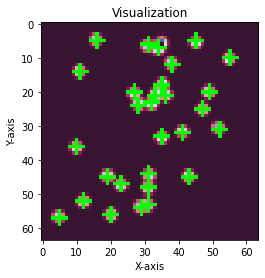

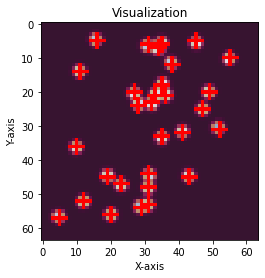

Test [1 1 2 2 2]
[12.00638936 52.12484841]
[12 52]
[[  75.  325.  544.  351.   92.]
 [ 361. 1576. 2395. 1616.  412.]
 [ 703. 2673. 4407. 2842.  721.]
 [ 487. 1957. 3047. 1908.  468.]
 [ 135.  548.  914.  545.  154.]]
[37.69840799 11.53275198]
[38 12]
[[ 448. 1193. 1420.  672.  117.]
 [1022. 3039. 3751. 1718.  314.]
 [1070. 3182. 3762. 1818.  342.]
 [ 434. 1328. 1540.  754.  171.]
 [  65.  232.  273.  132.   15.]]
[ 4.6555542  56.61889214]
[ 5 57]
[[ 377. 1041. 1319.  599.  109.]
 [1086. 3022. 3456. 1592.  305.]
 [1187. 3291. 3893. 1881.  322.]
 [ 528. 1442. 1704.  772.  143.]
 [  81.  260.  323.  139.   28.]]
[18.99682261 44.65868591]
[19 45]
[[ 196.  817. 1247.  795.  201.]
 [ 563. 2271. 3630. 2274.  570.]
 [ 659. 2636. 4174. 2593.  734.]
 [ 311. 1158. 1927. 1200.  672.]
 [  69.  244.  333.  302.  829.]]
[35.19309264 17.68850439]
[35 18]
[[ 130.  627. 1222.  898.  269.]
 [ 390. 1811. 3419. 2619.  779.]
 [ 626. 2219. 4172. 3243.  946.]
 [1320. 1833. 2530. 2377. 1028.]
 [3601. 2814. 254

In [6]:
print([tuple(row) for row in images[0].cord_of_points])
marked_test = mark_point(images[0].raw_image, find_local_maxima(images[0].raw_image))
plt.imshow(marked_test)
plt.title('Visualization')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()
marked_test = mark_point(marked_test, [tuple(row) for row in np.round(images[0].cord_of_points).astype(int)], (255, 0, 0))
plt.imshow(marked_test)
plt.title('Visualization')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

arr_test = [1.0, 1.3, 1.6, 1.9, 2.2]
print('Test', np.round(arr_test).astype(int))

for i in range(len(images[0].cord_of_points)):
    print(images[0].cord_of_points[i])
    print(np.round(images[0].cord_of_points[i]).astype(int))
    print(extract_subarray(images[0].raw_image, np.round(images[0].cord_of_points[i]).astype(int)))

[[0.4090700425096223, 0.3586205303018577, 0.5440100958923555], [-0.09445018580727549, -0.49322448504903704, 0.5021864496886755], [0.3333543778551409, -0.41752131638700263, 0.5342744527606795], [0.05187225825656583, -0.254417783492042, 0.25965195884806924], [0.29702587850142237, -0.17688513398981165, 0.3457061224886469], [0.3015920125420166, 0.4672480185784913, 0.556128090366482], [0.21541615755903365, 0.03767972472079606, 0.2186867224879768], [-0.19309264024074935, 0.31149561213232246, 0.36648913229839947], [0.2510470337162687, -0.31979496283859277, 0.4065629488709888], [0.2370139227301422, 0.026748489316222646, 0.23851851342952374], [-0.09481897166858744, 0.26805855800513356, 0.2843343593519431], [-0.2307630078065941, 0.051923311177386466, 0.23653244178245383], [-0.04542141648813214, -0.447522715719586, 0.44982183824356703], [-0.2031043791906768, 0.4353300017174213, 0.4803785998998293], [0.04541132423706529, -0.055995211920787824, 0.07209474410120208], [0.4952974861269652, 0.452837648

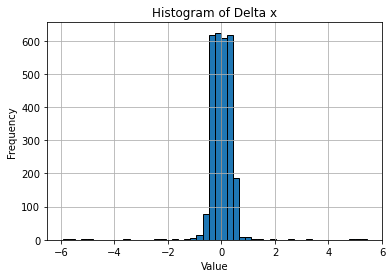

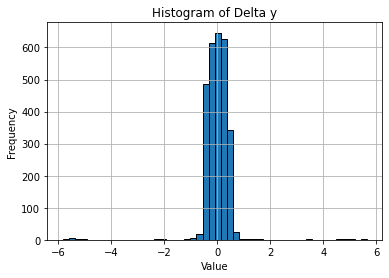

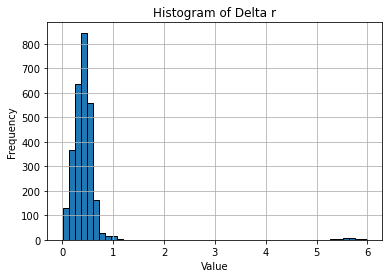

In [7]:
import math
def distance(p, q):
    # Function to calculate Euclidean distance between points p and q
    return math.sqrt((q[0] - p[0])**2 + (q[1] - p[1])**2)

def smallest_distance_to_set(point, point_set):
    # point is a tuple (x, y) representing the point P
    # point_set is a list of tuples [(x1, y1), (x2, y2), ...] representing the set S
    
    if not point_set:
        return float('inf')  # If point_set is empty, return infinity
    
    x_distance = float('inf')
    y_distance = float('inf')
    min_distance = float('inf')
    
    for q in point_set:
        dist = distance(point, q)
        if dist < min_distance:
            min_distance = dist
            x_distance = point[0] - q[0]
            y_distance = point[1] - q[1]
    
    return [x_distance, y_distance, min_distance]

dist = []
rev_dist = []
large_error = []
large_error_points = []
not_found = []
not_found_points = []

for i in range (len(images)):
    finded = find_local_maxima(images[i].raw_image)
    for j in range(len(finded)):
        dist.append(smallest_distance_to_set(finded[j], [tuple(row) for row in images[i].cord_of_points]))
        if dist[-1][2] > 1.5:
            large_error.append(i)
            large_error_points.append(finded[j])
    for j in range(len(images[i].cord_of_points)):
        rev_dist.append(smallest_distance_to_set(images[i].cord_of_points[j], finded))
        if rev_dist[-1][2] > 1.5:
            not_found.append(i)
            not_found_points.append(tuple(np.round(images[i].cord_of_points[j]).astype(int)))


print(dist)
dist_array = np.array(dist).T   
print(dist_array.shape)
print(dist_array)
print(large_error)
print(large_error_points)
print(not_found)
print(not_found_points)

# Plotting the histogram
plt.hist(dist_array[0], bins=50, edgecolor='black')  # Adjust bins as needed
plt.title('Histogram of Delta x')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.hist(dist_array[1], bins=50, edgecolor='black')  # Adjust bins as needed
plt.title('Histogram of Delta y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.hist(dist_array[2], bins=50, edgecolor='black')  # Adjust bins as needed
plt.title('Histogram of Delta r')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

[1, 2, 6, 6, 9, 11, 15, 18, 18, 22, 39, 39, 42, 42, 55, 55, 55, 59, 67, 81, 94, 95, 95, 96, 98]
[(8, 19), (19, 30), (5, 11), (11, 51), (49, 40), (56, 38), (26, 42), (38, 12), (18, 49), (56, 25), (45, 7), (53, 43), (32, 0), (9, 16), (15, 25), (22, 30), (60, 60), (56, 55), (46, 7), (10, 61), (5, 22), (13, 24), (16, 51), (58, 4), (40, 5)]
Image 1 Raw Data
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  4.]
 [ 0.  0.  0.  0. 31.]
 [ 0.  0.  0.  4. 64.]]


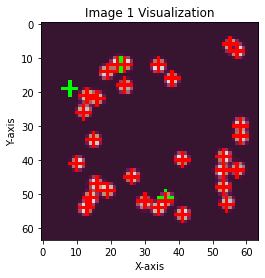

Image 2 Raw Data
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 4.  0.  0.  0.  0.]
 [78. 28.  4.  0.  0.]]


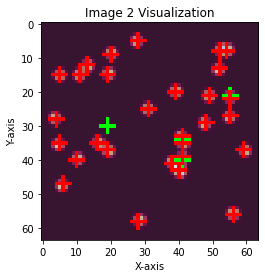

Image 6 Raw Data
[[ 0.  0.  0.  0.  2.]
 [ 0.  0.  0.  0.  3.]
 [ 0.  0.  1.  0. 11.]
 [ 0.  0.  0.  0. 12.]
 [ 0.  0.  0.  1.  8.]]


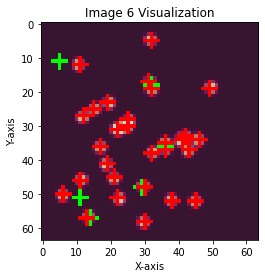

Image 6 Raw Data
[[31. 19. 36. 36.  8.]
 [45.  0.  0.  0.  2.]
 [31.  0.  1.  0.  0.]
 [13.  0.  0.  0.  0.]
 [ 1.  0.  1.  4. 14.]]


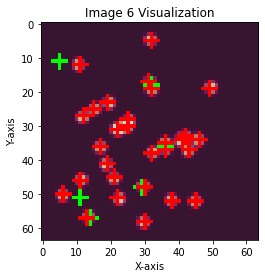

Image 9 Raw Data
[[ 3.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  3. 13. 36.]]


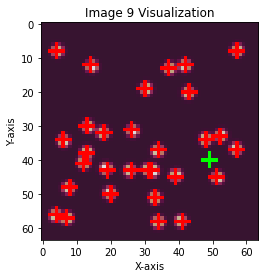

Image 11 Raw Data
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 2. 2. 2. 1.]]


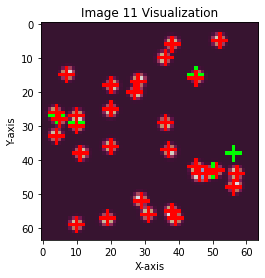

Image 15 Raw Data
[[ 8.  9. 11.  1.  1.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


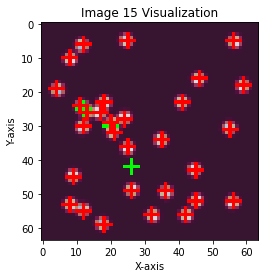

Image 18 Raw Data
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2.]
 [0. 0. 1. 0. 2.]
 [0. 0. 0. 0. 7.]
 [0. 0. 0. 0. 2.]]


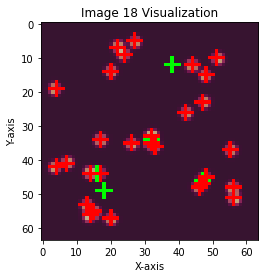

Image 18 Raw Data
[[41. 52. 21.  2.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 8.  0.  0.  0.  0.]]


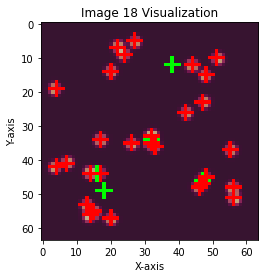

Image 22 Raw Data
[[83. 53. 17.  0.  0.]
 [ 3.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


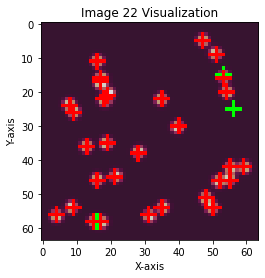

Image 39 Raw Data
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  1.  8. 16.]]


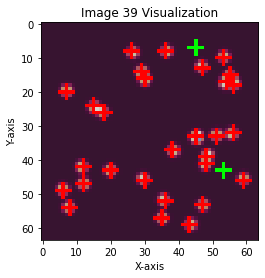

Image 39 Raw Data
[[59.  0.  0.  0.  0.]
 [27.  0.  0.  0.  0.]
 [ 9.  0.  1.  0.  1.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  7.]]


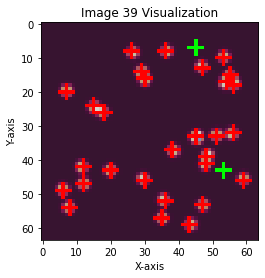

Image 42 Raw Data
[[ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  4. 15. 25.]]


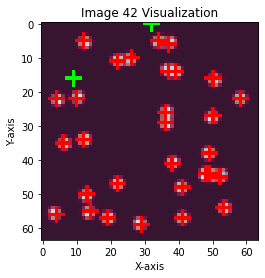

Image 42 Raw Data
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 4. 9. 6.]]


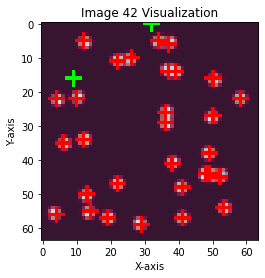

Image 55 Raw Data
[[16.  7.  1.  0.  3.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 8. 10. 12.  2.  0.]]


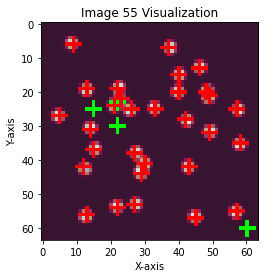

Image 55 Raw Data
[[ 2.  1.  2.  8. 47.]
 [ 0.  0.  0.  0.  2.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


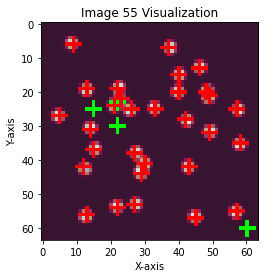

Image 55 Raw Data
[[57. 13.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


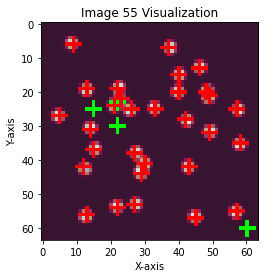

Image 59 Raw Data
[[ 7. 17.  7.  0.  1.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


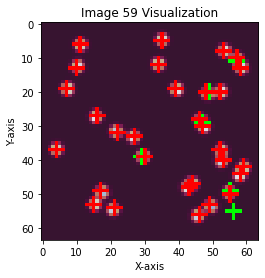

Image 67 Raw Data
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [12. 15. 10.  2.  0.]]


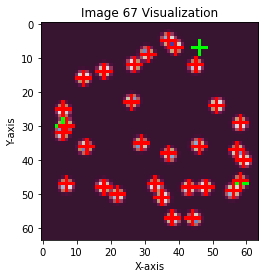

Image 81 Raw Data
[[35.  3.  0.  0.  0.]
 [ 4.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


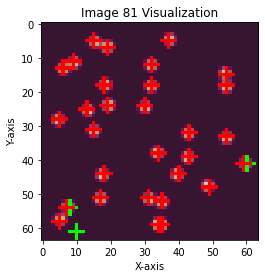

Image 94 Raw Data
[[ 6. 12. 12.  2.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


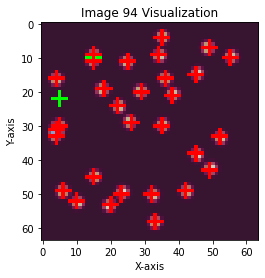

Image 95 Raw Data
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  7.]
 [ 0.  0.  0.  0. 26.]
 [ 0.  0.  0.  0. 30.]]


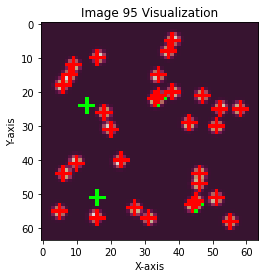

Image 95 Raw Data
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 2.  9. 12.  2.  0.]]


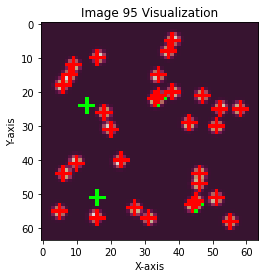

Image 96 Raw Data
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  3. 18. 50. 51.]]


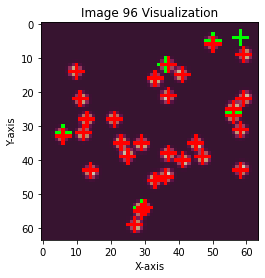

Image 98 Raw Data
[[18.  0.  0.  0.  0.]
 [12.  0.  0.  0.  0.]
 [ 6.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


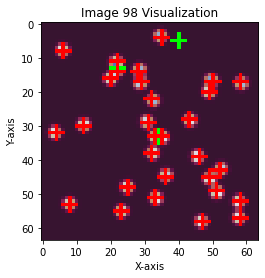

In [8]:
print(large_error)
print(large_error_points)

for i in range (len(large_error)):
    print('Image ' + str(large_error[i]) + ' Raw Data')
    # finded_list = find_local_maxima(images[large_error[i]].raw_image)
    # for j in range(len(finded_list)):
    #     print(extract_subarray(images[large_error[i]].raw_image, finded_list[j]))
    print(extract_subarray(images[large_error[i]].raw_image, large_error_points[i]))
    marked_test = mark_point(images[large_error[i]].raw_image, find_local_maxima(images[large_error[i]].raw_image))
    marked_test = mark_point(marked_test, [tuple(row) for row in np.round(images[large_error[i]].cord_of_points).astype(int)], (255, 0, 0))
    plt.imshow(marked_test)
    plt.title('Image ' + str(large_error[i]) + ' Visualization')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()